In [1]:
from kitaev import *

hi


In [2]:
N = 300
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
h_1 = Hamiltonian(d,N,onsite(mu=0*t),offsite(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),offsite(delta=Delta))
chiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()
var_T = np.linspace(0.2 / t, 5 / t, 300)
var_E = np.linspace(-2,2,300)
x, y = np.meshgrid(var_T, var_E)
var_f = []
var_f_0 = []
var_f_pi = []

for j in tqdm(range(len(var_T))):
    h_f = floquet_hamiltonian([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    G = np.array(la.inv((0.00000000001*1j)*np.eye(len(h_f))-h_f))
    var_f.append( G[0,1].imag)


    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    var_f_0.append( G_0_odd[0,1].imag)

    G_pi_pos = np.array(la.inv((1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((- 1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd = (G_pi_pos - G_pi_neg)/2
    var_f_pi.append( G_pi_odd[0,1].imag)

  0%|          | 1/300 [00:03<19:25,  3.90s/it]

logm result may be inaccurate, approximate err = 1.57282144876659e-11


  1%|          | 2/300 [00:07<18:39,  3.76s/it]

logm result may be inaccurate, approximate err = 2.8823067798509437e-11


  1%|          | 3/300 [00:11<19:01,  3.84s/it]

logm result may be inaccurate, approximate err = 5.0780194222753904e-11


  1%|▏         | 4/300 [00:15<18:58,  3.85s/it]

logm result may be inaccurate, approximate err = 8.629921519938462e-11


  2%|▏         | 5/300 [00:18<18:27,  3.75s/it]

logm result may be inaccurate, approximate err = 1.4204844686183047e-10


  2%|▏         | 6/300 [00:22<18:12,  3.72s/it]

logm result may be inaccurate, approximate err = 2.272144538694346e-10


  2%|▏         | 7/300 [00:26<17:47,  3.64s/it]

logm result may be inaccurate, approximate err = 3.5421596370553644e-10


  3%|▎         | 8/300 [00:30<18:10,  3.73s/it]

logm result may be inaccurate, approximate err = 5.39564949482183e-10


  3%|▎         | 9/300 [00:33<17:50,  3.68s/it]

logm result may be inaccurate, approximate err = 8.048987199800176e-10


  3%|▎         | 10/300 [00:37<17:58,  3.72s/it]

logm result may be inaccurate, approximate err = 1.1780455681789443e-09


  4%|▎         | 11/300 [00:40<17:32,  3.64s/it]

logm result may be inaccurate, approximate err = 1.6944134530529963e-09


  4%|▍         | 12/300 [00:44<17:20,  3.61s/it]

logm result may be inaccurate, approximate err = 2.3985737008306315e-09


  4%|▍         | 13/300 [00:47<17:11,  3.60s/it]

logm result may be inaccurate, approximate err = 3.3459700874338272e-09


  5%|▍         | 14/300 [00:51<17:11,  3.61s/it]

logm result may be inaccurate, approximate err = 4.604988650418688e-09


  5%|▌         | 15/300 [00:55<17:04,  3.60s/it]

logm result may be inaccurate, approximate err = 6.259156775414464e-09


  5%|▌         | 16/300 [00:58<16:44,  3.54s/it]

logm result may be inaccurate, approximate err = 8.4097882508408e-09


 13%|█▎        | 38/300 [02:14<14:43,  3.37s/it]

logm result may be inaccurate, approximate err = 2.2875175707699276e-13


 13%|█▎        | 39/300 [02:17<15:07,  3.48s/it]

logm result may be inaccurate, approximate err = 2.2251259734242678e-13


 14%|█▎        | 41/300 [02:25<15:19,  3.55s/it]

logm result may be inaccurate, approximate err = 2.244285158511448e-13


 14%|█▍        | 43/300 [02:31<14:40,  3.43s/it]

logm result may be inaccurate, approximate err = 2.2335757760192263e-13


 21%|██▏       | 64/300 [03:36<11:39,  2.96s/it]

logm result may be inaccurate, approximate err = 2.311499387872286e-13


 23%|██▎       | 69/300 [03:56<12:23,  3.22s/it]

logm result may be inaccurate, approximate err = 2.2290422161874463e-13


 24%|██▎       | 71/300 [04:01<10:38,  2.79s/it]

logm result may be inaccurate, approximate err = 2.349618479400099e-13


 24%|██▍       | 72/300 [04:03<10:02,  2.64s/it]

logm result may be inaccurate, approximate err = 2.241838306768464e-13


 26%|██▌       | 77/300 [04:14<08:41,  2.34s/it]

logm result may be inaccurate, approximate err = 2.5017377075102274e-13


 26%|██▌       | 78/300 [04:17<08:49,  2.38s/it]

logm result may be inaccurate, approximate err = 2.5037919499223694e-13


 26%|██▋       | 79/300 [04:19<08:51,  2.41s/it]

logm result may be inaccurate, approximate err = 2.4369350469855203e-13


 27%|██▋       | 80/300 [04:22<08:51,  2.41s/it]

logm result may be inaccurate, approximate err = 2.60461215064023e-13


 27%|██▋       | 81/300 [04:24<08:53,  2.44s/it]

logm result may be inaccurate, approximate err = 2.6238536998083643e-13


 27%|██▋       | 82/300 [04:27<08:54,  2.45s/it]

logm result may be inaccurate, approximate err = 2.5879618430468024e-13


 28%|██▊       | 83/300 [04:29<08:59,  2.49s/it]

logm result may be inaccurate, approximate err = 2.681638679289721e-13


 28%|██▊       | 84/300 [04:32<08:59,  2.50s/it]

logm result may be inaccurate, approximate err = 2.911930146312473e-13


 28%|██▊       | 85/300 [04:34<09:02,  2.52s/it]

logm result may be inaccurate, approximate err = 3.2254085599167145e-13


 29%|██▊       | 86/300 [04:37<09:11,  2.58s/it]

logm result may be inaccurate, approximate err = 2.9932902653443285e-13


 29%|██▉       | 87/300 [04:40<09:15,  2.61s/it]

logm result may be inaccurate, approximate err = 2.7081377350341983e-13


 29%|██▉       | 88/300 [04:43<09:20,  2.64s/it]

logm result may be inaccurate, approximate err = 2.5803076974517926e-13


 30%|██▉       | 89/300 [04:45<09:09,  2.61s/it]

logm result may be inaccurate, approximate err = 2.306018811012088e-13


 30%|███       | 90/300 [04:48<09:10,  2.62s/it]

logm result may be inaccurate, approximate err = 2.400761184735702e-13


 30%|███       | 91/300 [04:50<09:06,  2.62s/it]

logm result may be inaccurate, approximate err = 2.370586431826044e-13


 31%|███       | 92/300 [04:53<08:53,  2.57s/it]

logm result may be inaccurate, approximate err = 2.2677790365610884e-13


 31%|███       | 93/300 [04:55<08:44,  2.53s/it]

logm result may be inaccurate, approximate err = 2.2581494615265077e-13


 35%|███▍      | 104/300 [05:27<09:57,  3.05s/it]

logm result may be inaccurate, approximate err = 2.2931401595290906e-13


 35%|███▌      | 106/300 [05:34<10:29,  3.25s/it]

logm result may be inaccurate, approximate err = 2.36333564857223e-13


 36%|███▌      | 107/300 [05:38<11:12,  3.49s/it]

logm result may be inaccurate, approximate err = 2.387533903119989e-13


 36%|███▌      | 108/300 [05:41<11:16,  3.52s/it]

logm result may be inaccurate, approximate err = 2.3557256301030767e-13


 36%|███▋      | 109/300 [05:45<10:55,  3.43s/it]

logm result may be inaccurate, approximate err = 2.4188127045775976e-13


 37%|███▋      | 110/300 [05:48<10:56,  3.45s/it]

logm result may be inaccurate, approximate err = 2.4718711050336435e-13


 37%|███▋      | 111/300 [05:52<11:15,  3.57s/it]

logm result may be inaccurate, approximate err = 2.482070690999897e-13


 37%|███▋      | 112/300 [05:55<11:03,  3.53s/it]

logm result may be inaccurate, approximate err = 2.3780411861850334e-13


 38%|███▊      | 113/300 [05:59<11:27,  3.68s/it]

logm result may be inaccurate, approximate err = 2.393673750839863e-13


 38%|███▊      | 114/300 [06:04<12:02,  3.88s/it]

logm result may be inaccurate, approximate err = 2.280732927034574e-13


 38%|███▊      | 115/300 [06:07<11:47,  3.83s/it]

logm result may be inaccurate, approximate err = 2.2820373303511277e-13


 42%|████▏     | 127/300 [06:51<10:25,  3.62s/it]

logm result may be inaccurate, approximate err = 2.2453873665790704e-13


 43%|████▎     | 128/300 [06:55<10:25,  3.63s/it]

logm result may be inaccurate, approximate err = 2.3142445315161057e-13


100%|██████████| 300/300 [17:08<00:00,  3.43s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


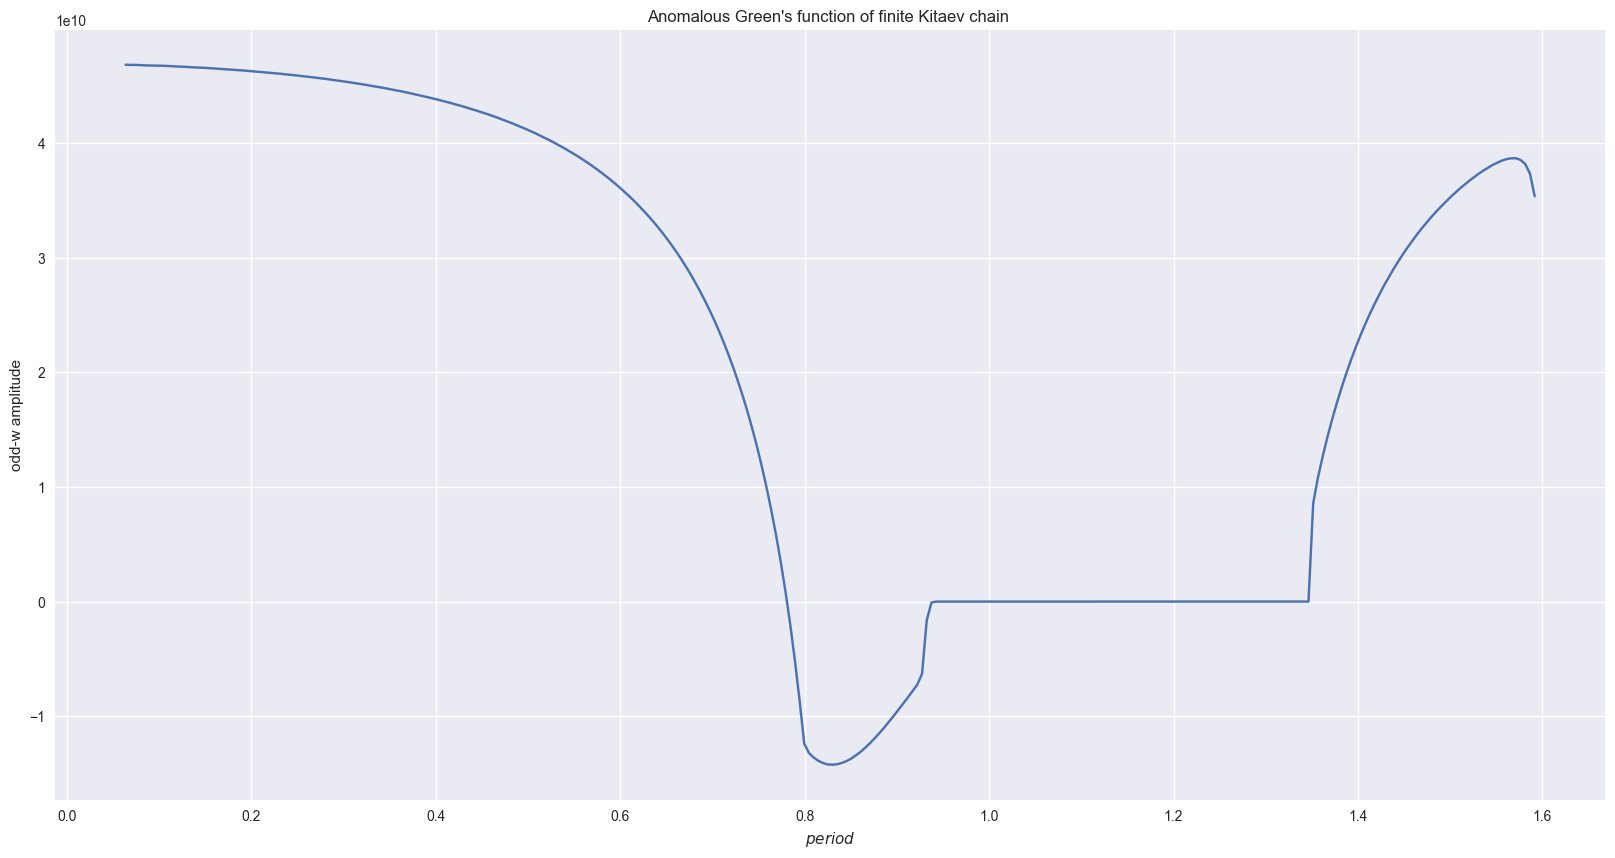

1.5707963267948966


In [3]:
plt.title("Anomalous Green's function of finite Kitaev chain ")
plt.plot(var_T,var_f)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()
print(delta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


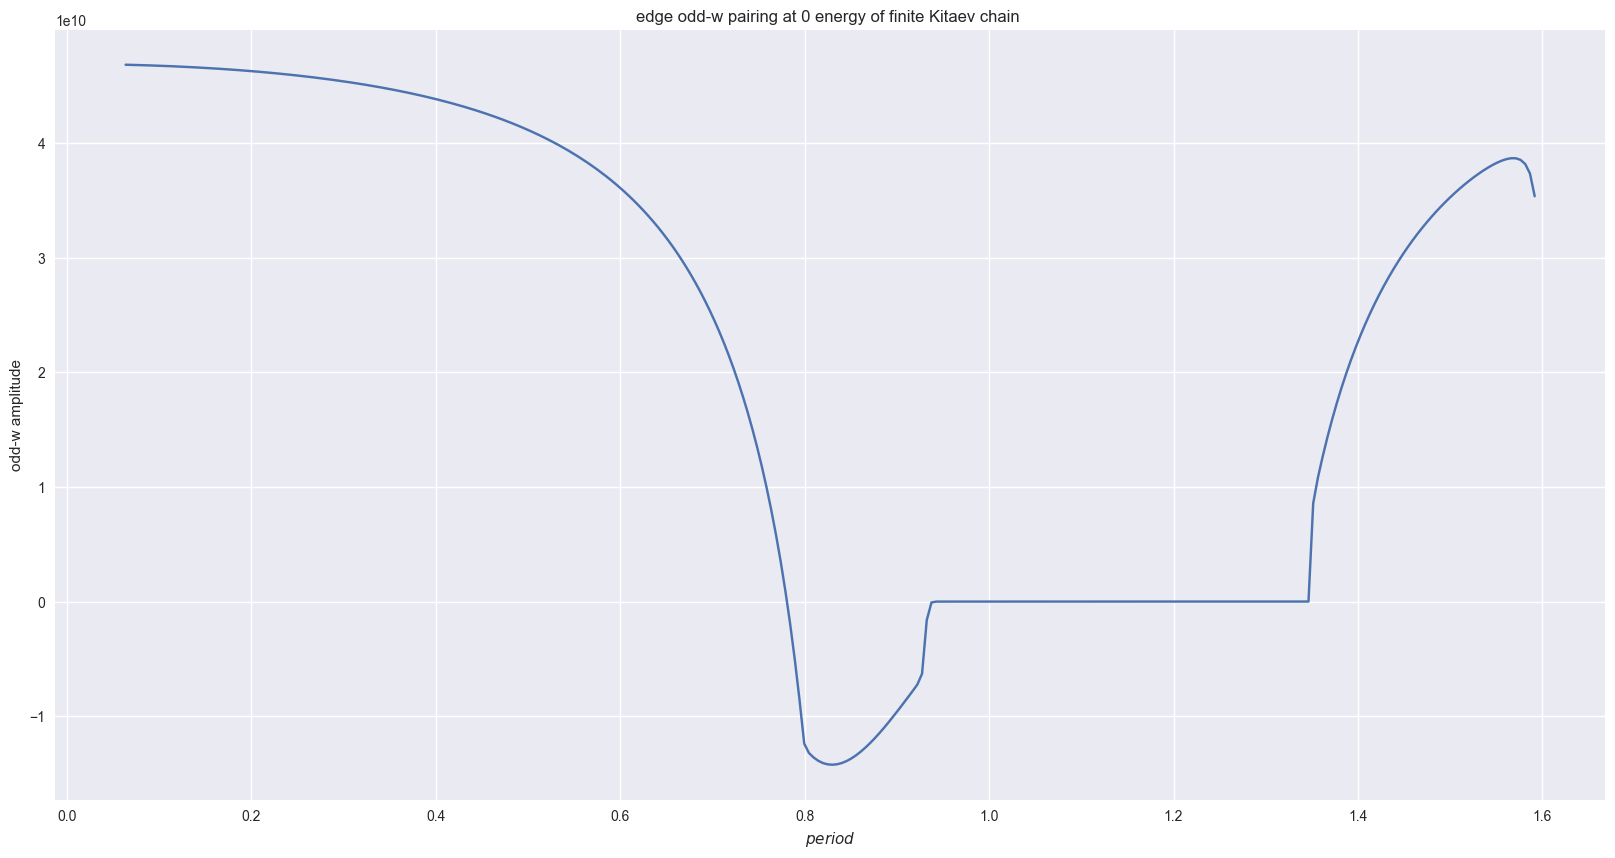

In [4]:
plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,var_f_0)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


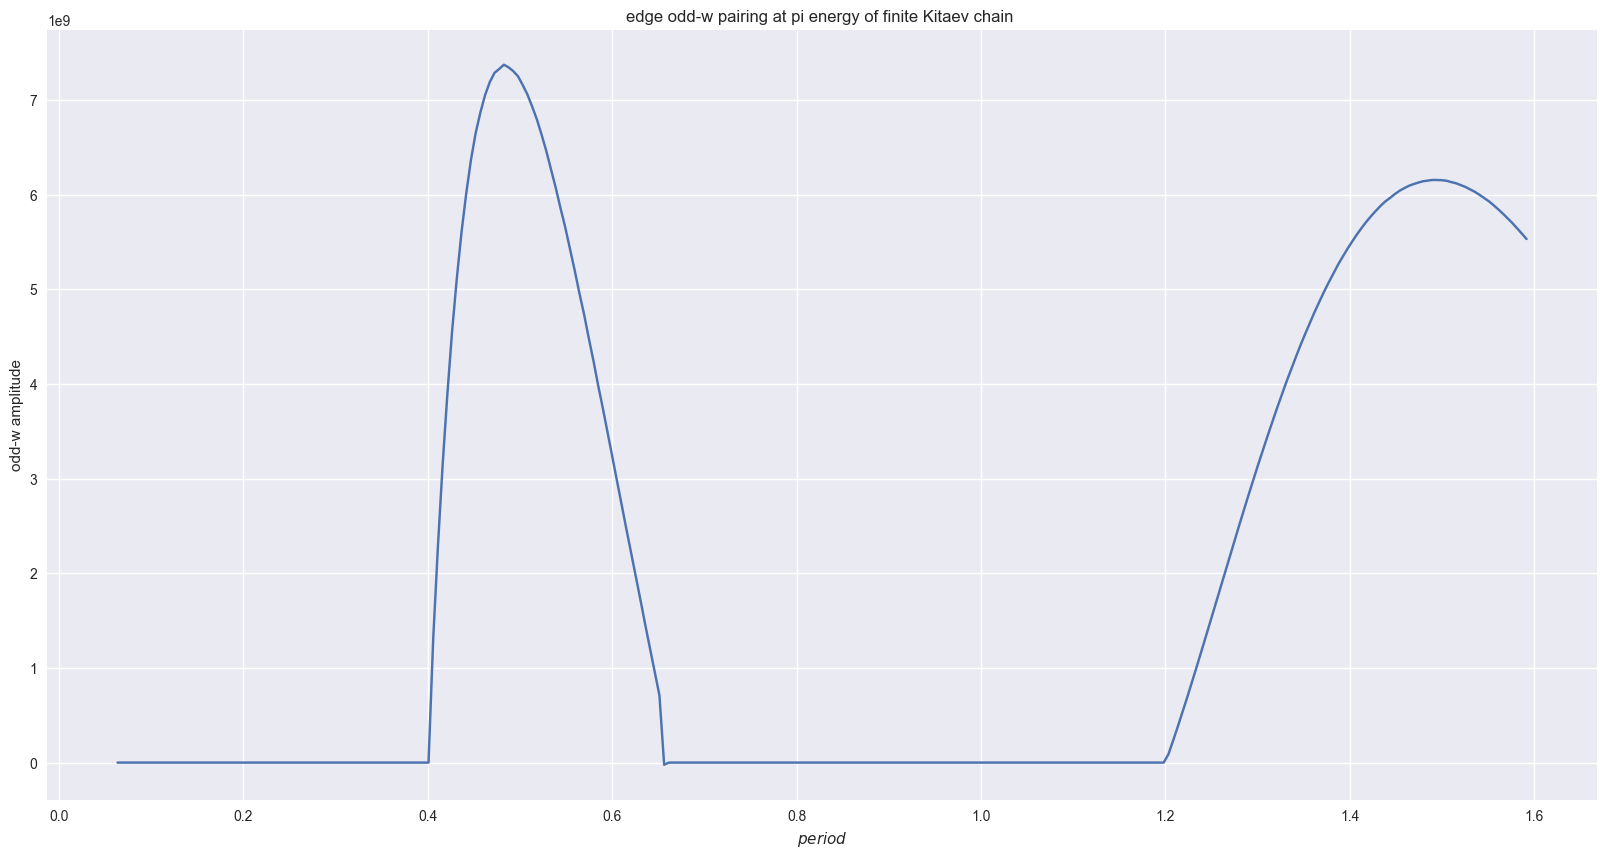

In [5]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,var_f_pi)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


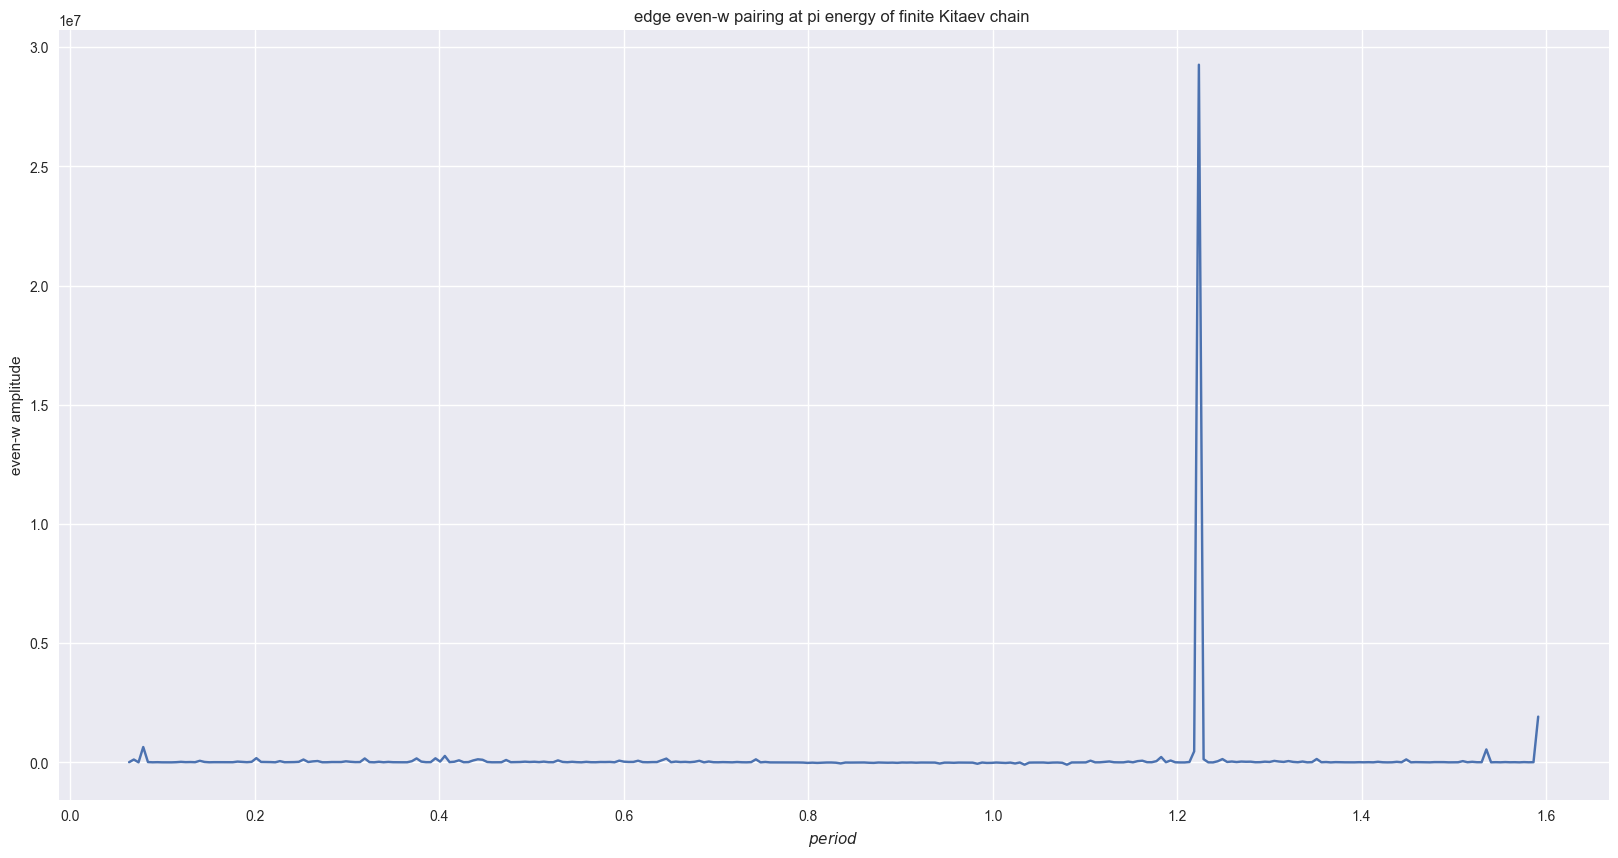

In [6]:
f_even = [var_f[i]-var_f_0[i] for i in range(len(var_f))]
f_even = np.abs(f_even)
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,[var_f_0[i]/f_even[i] for i in range(len(var_f))])


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


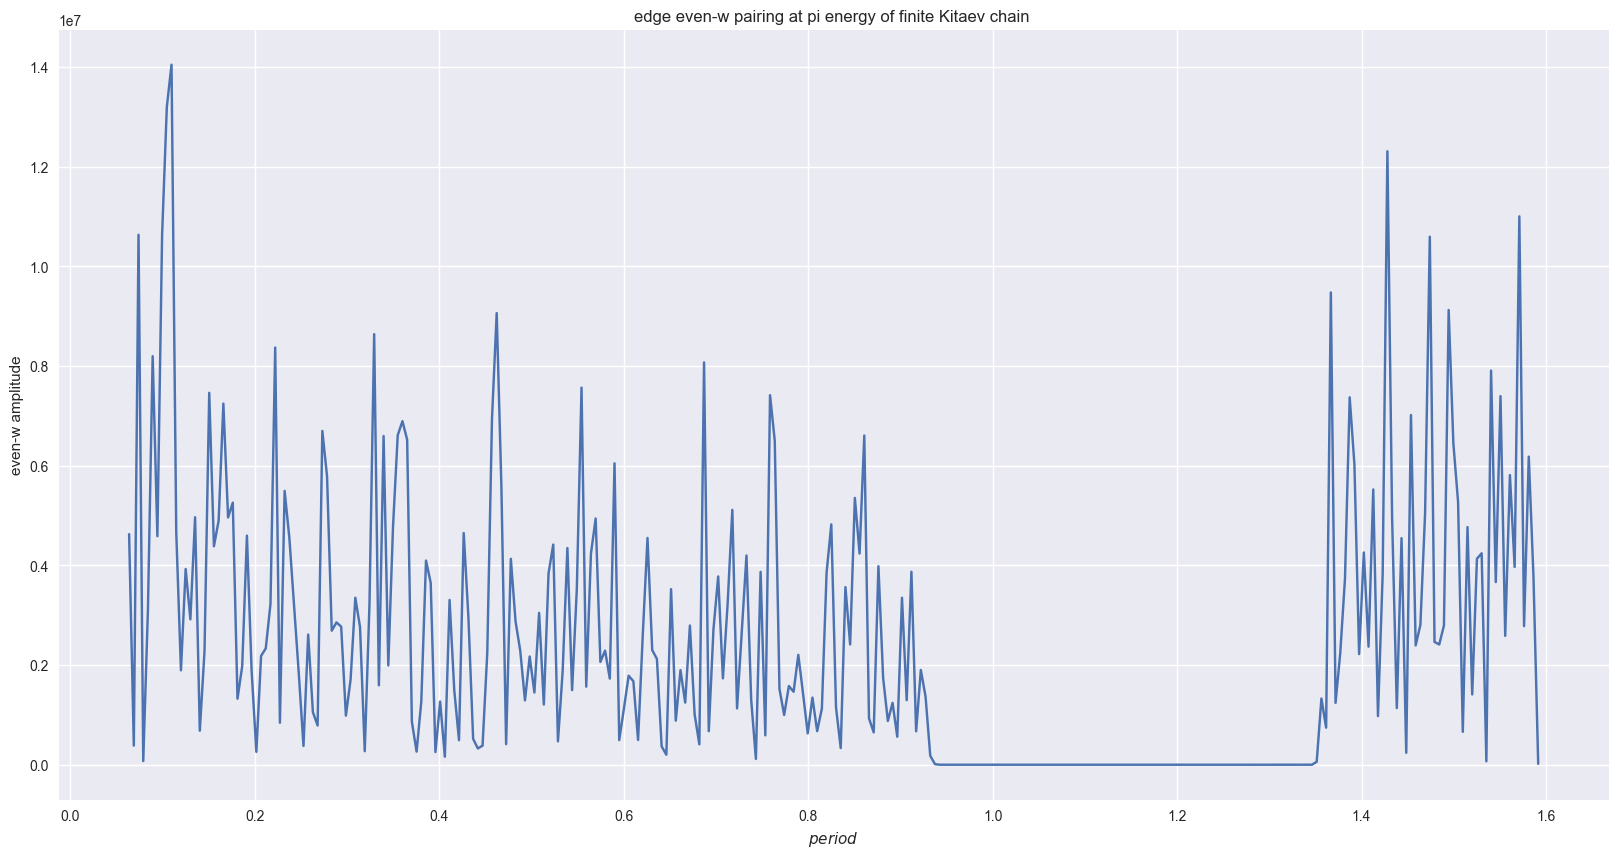

In [7]:
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,f_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()